# ST2195 PROGRAMMING COURSEWORK

## Importing Packages

In [1]:
#importing the packages used to help query and visualize the data

import sqlite3
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random

#importing the packages that will be used for q5 machine learning 
#machine learning
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import fetch_openml
from sklearn.metrics import r2_score

In [2]:
#connecting python to SQLite DBbrowser to access and query the data
conn = sqlite3.connect('Python_Coursework.db')
c = conn.cursor()

#c will be the connection used later on to query data using c.execute(''' ... ''').fetchall()

## Reading and writing datafiles to SQLite DBbrowser

In [ ]:
#Using pandas read_csv function to read the csv data files and save it into Jupyternotebook. 
#encoding = 'latin1' is a type of encoding and is used to solve the UnicodeDecodeError
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planedata = pd.read_csv("plane-data.csv")
Y2000 = pd.read_csv("Year2000.csv", encoding ='latin1')
Y2001 = pd.read_csv("Year2001.csv", encoding ='latin1') 

In [ ]:
#use .to_sql to create the tables and data from jupyter to SQL
airports.to_sql('airports', con = conn, index = False)
carriers.to_sql('carriers', con = conn, index = False)
planedata.to_sql('planedata', con = conn, index = False)
Y2000.to_sql('ontime', con = conn, if_exists = 'append', index = False)
Y2001.to_sql('ontime', con = conn, if_exists = 'append', index = False)

## Question 1 : When is the best time of day, day of the week, and time of year to fly to minimise delays?

### Q1a Plotting average delay and count of delay against day

In [3]:
#Use c.execute(), call the connection to query columns from the dataset in DBbrowser
#SELECT is to choose the columns that you want to query
#FROM is to select the table to query from
#WHERE is to set the conditions when querying
#GROUP BY is to group and categorize the data by a certain column
#ORDER BY is order by the data in ascending order
q1a = c.execute('''
SELECT DayOfWeek, AVG(ArrDelay + DepDelay) AS AVGDelay , COUNT(DepDelay)
FROM ontime
WHERE Cancelled=0 AND Diverted=0 AND ArrDelay >0 AND DepDelay >0
GROUP BY DayOfWeek
ORDER BY DayOfWeek
''').fetchall()


In [4]:
#changing q1a from a list to a dataframe which will be used for plotting graphs
q1a_df = (pd.DataFrame(q1a, columns = ['Day','AVG Delay','Count'])) #Creating the column names in the dataframe. Number of column names must equal columns in the list
q1a_df = q1a_df.round({'AVG Delay': 1, 'Total Delay': 0}) #Rounding AVG delay to 1 decimal point
#info of q1a
q1a_df.info()   #use .info() to see information about the dataframe -> number of columns, number of rows and type of data
q1a_df.head(3)   #yse .head*() to see a dataframe. Put number into brackets eg: .head(3) to see 3 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Day        7 non-null      int64  
 1   AVG Delay  7 non-null      float64
 2   Count      7 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 296.0 bytes


,Day,AVG Delay,Count
0,1,67.0,486996
1,2,65.7,429378
2,3,67.9,471605


C:\Users\James\AppData\Local\Temp/ipykernel_15256/2237440201.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  q1a1_plt.set_yticklabels(q1a1_plt.get_yticks(), size = 15)
C:\Users\James\AppData\Local\Temp/ipykernel_15256/2237440201.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  q1a2_plt.set_yticklabels(q1a2_plt.get_yticks(), size = 15)


[Text(0, 0.0, '0.0'),
 Text(0, 100000.0, '100000.0'),
 Text(0, 200000.0, '200000.0'),
 Text(0, 300000.0, '300000.0'),
 Text(0, 400000.0, '400000.0'),
 Text(0, 500000.0, '500000.0'),
 Text(0, 600000.0, '600000.0'),
 Text(0, 700000.0, '700000.0')]

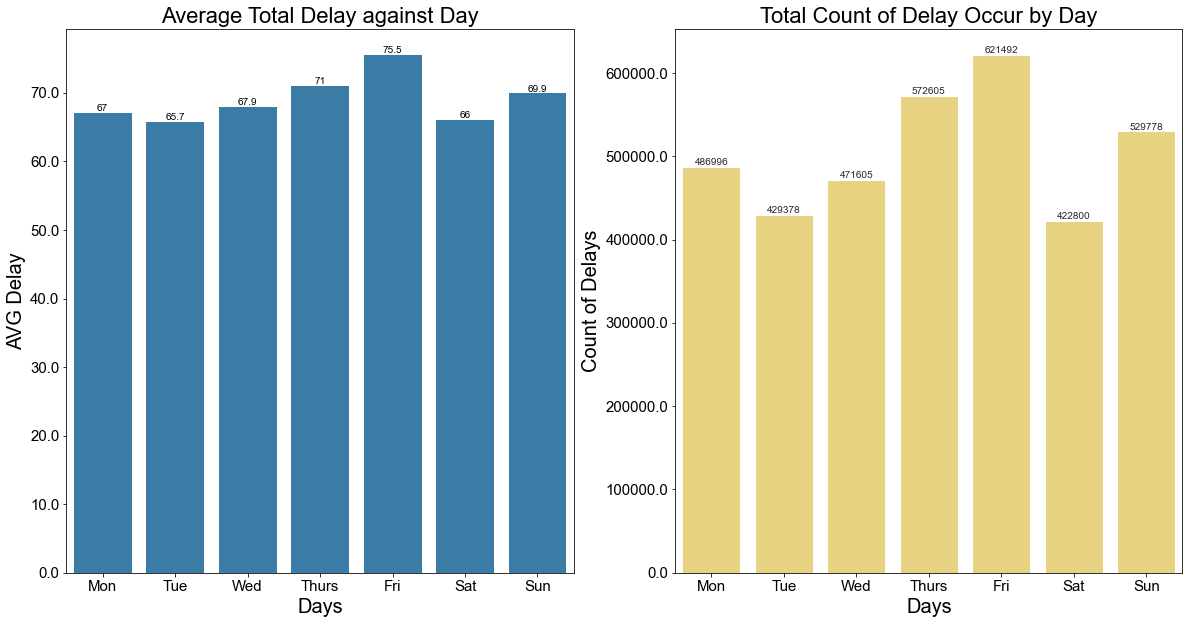

In [5]:
#Using seaborn package to plot graphs

#AVG Delay Plot for q1a
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10))  #To create 2 axis side by side with horizontal length of 20 and 10 of verticle
#to plot using specific x and y variable, show where the data is queried, color of graph and which axis it will be using
q1a1_plt = sns.barplot(x="Day", y="AVG Delay", data=q1a_df, color = '#2980B9', ax = ax1) 
#Labelling the barchart with values for each bar according to average delay
q1a1_plt.bar_label(q1a1_plt.containers[0], size = 10)
#Changing 1-7 to Monday to Sunday
q1a1_plt.set_xticklabels(['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
#Setting title of first axis with size 22
q1a1_plt.set_title("Average Total Delay against Day", size = 22)
#Setting the name of X axis as days with size 20
q1a1_plt.set_xlabel("Days", size = 20)
#Setting the name of Y axis as AVG Delay with size 20
q1a1_plt.set_ylabel("AVG Delay", size = 20)
#Setting the size of monday to friday to 15
q1a1_plt.set_xticklabels(q1a1_plt.get_xmajorticklabels(), fontsize = 15)
#Setting the size of average delay numbers of the y axis as 15
q1a1_plt.set_yticklabels(q1a1_plt.get_yticks(), size = 15)
sns.set_style("whitegrid")

#Creating Count plot for q1a
q1a2_plt = sns.barplot(x="Day", y="Count", data=q1a_df, color = '#F7DC6F', ax = ax2)
q1a2_plt.bar_label(q1a2_plt.containers[0])
q1a2_plt.set_xticklabels(['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
q1a2_plt.set_title("Total Count of Delay Occur by Day", size = 22)
q1a2_plt.set_xlabel("Days",size = 20)
q1a2_plt.set_ylabel("Count of Delays",size = 20)
q1a2_plt.set_xticklabels(q1a2_plt.get_xmajorticklabels(), fontsize = 15)
q1a2_plt.set_yticklabels(q1a2_plt.get_yticks(), size = 15)



### The rest of the code are similar, will put a comment if i add something unique that needs explanation

### Q1b Plotting Average Delay and Count of delay against Month

In [9]:
q1b = c.execute('''
SELECT Month , AVG(ArrDelay + DepDelay) AS AVGDelay , COUNT(ArrDelay)
FROM ontime
WHERE Cancelled=0 AND Diverted=0 AND ArrDelay >0 AND DepDelay >0
GROUP BY Month
ORDER BY Month
''').fetchall()


In [10]:
#q1b
q1b_df = pd.DataFrame(q1b, columns = ['Month','AVG Delay','Count'])
q1b_df = q1b_df.round({'AVG Delay': 1, 'Total Delay': 0})
#info of q1b
q1b_df.info()
q1b_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      12 non-null     int64  
 1   AVG Delay  12 non-null     float64
 2   Count      12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes


,Month,AVG Delay,Count
0,1,66.2,286850
1,2,70.4,283925
2,3,66.7,310524
3,4,68.0,282222
4,5,70.0,277172


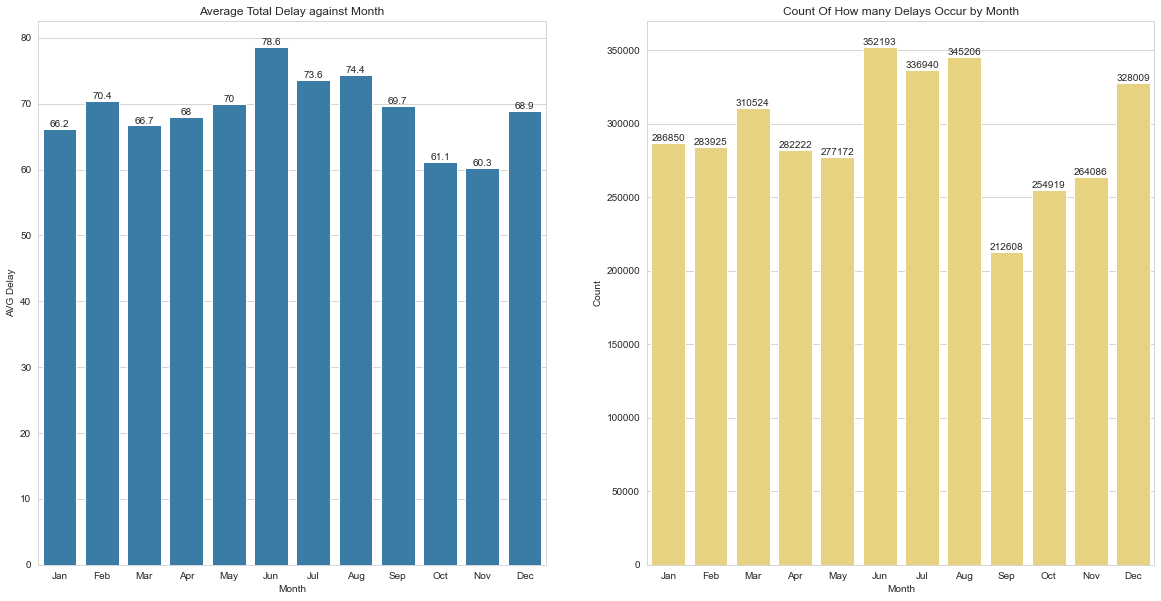

In [11]:
#Plot for q1b
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10))
q1b1_plt = sns.barplot(x="Month", y="AVG Delay",  data=q1b_df, color = '#2980B9', ax = ax1)
q1b1_plt.bar_label(q1b1_plt.containers[0])
q1b1_plt.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
q1b1_plt.title.set_text("Average Total Delay against Month")
q1b1_plt.set_xlabel("Month")
q1b1_plt.set_ylabel("AVG Delay")
q1b2_plt = sns.barplot(x="Month", y="Count",  data=q1b_df, color = '#F7DC6F', ax = ax2)
q1b2_plt.bar_label(q1b2_plt.containers[0])
q1b2_plt.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
q1b2_plt.title.set_text("Count Of How many Delays Occur by Month")

### Q1c Plotting Average Delay and Count of delay against Time

In [12]:
q1c1 = c.execute('''
SELECT Deptime as Time, AVG(ArrDelay + DepDelay) AS AVGDelay
FROM ontime
WHERE Cancelled=0 AND Diverted=0 AND ArrDelay >0 AND DepDelay >0 
GROUP BY Time 
ORDER BY Time
''').fetchall()


In [13]:
#Use CASE WHEN to create sub categories using specific conditions when querying. THEN is to set the name of that sub category
#The entire sub category is under the TimeofDay
q1c2 = c.execute('''
SELECT AVG(ArrDelay + DepDelay) AS AvgDelay,(Case
WHEN Deptime > 0500 AND Deptime <= 1100 THEN 'Morning'
WHEN Deptime > 1100 AND Deptime <= 1700 THEN 'Noon'
WHEN Deptime > 1700 AND Deptime <= 2400 THEN 'Night'
When Deptime > 0000 AND Deptime <= 0500 THEN 'Midnight'
END) As TimeofDay
FROM Ontime
WHERE Cancelled=0 AND Diverted=0 AND ArrDelay >0 AND DepDelay >0
GROUP BY TimeofDay
Order by AVGDelay
''').fetchall()

In [14]:
#Changing q1c1 from list to dataframe
q1c1_df = pd.DataFrame(q1c1, columns = ['Time','AVG Delay'])
q1c1_df = q1c1_df.round({'AVG Delay': 1, 'Total Delay': 0})

#Convert to Hours 24hour clock
q1c1_df['Time'] = q1c1_df['Time'].astype('float64') 
q1c1_df['Time'] = pd.to_datetime(q1c1_df["Time"], unit='h').dt.strftime("%H:%M") #Changing time variable to HHMM format for nicer plotting

q1c1_df.info()
q1c1_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       1434 non-null   object 
 1   AVG Delay  1434 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.5+ KB


,Time,AVG Delay
0,01:00,146.6
1,02:00,145.9
2,03:00,146.0
3,04:00,135.9
4,05:00,153.9


In [15]:
#Changing q1c2 from list to dataframe
q1c2_df = pd.DataFrame(q1c2, columns = ['AVG Delay', 'Time of Day'])
q1c2_df = q1c2_df.round({'AVG Delay': 1})

q1c2_df.info()
q1c2_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AVG Delay    4 non-null      float64
 1   Time of Day  4 non-null      object 
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


,AVG Delay,Time of Day
0,45.5,Morning
1,61.3,Noon
2,86.6,Night
3,190.1,Midnight


[Text(0, 0, '45.5'),
 Text(0, 0, '61.3'),
 Text(0, 0, '86.6'),
 Text(0, 0, '190.1')]

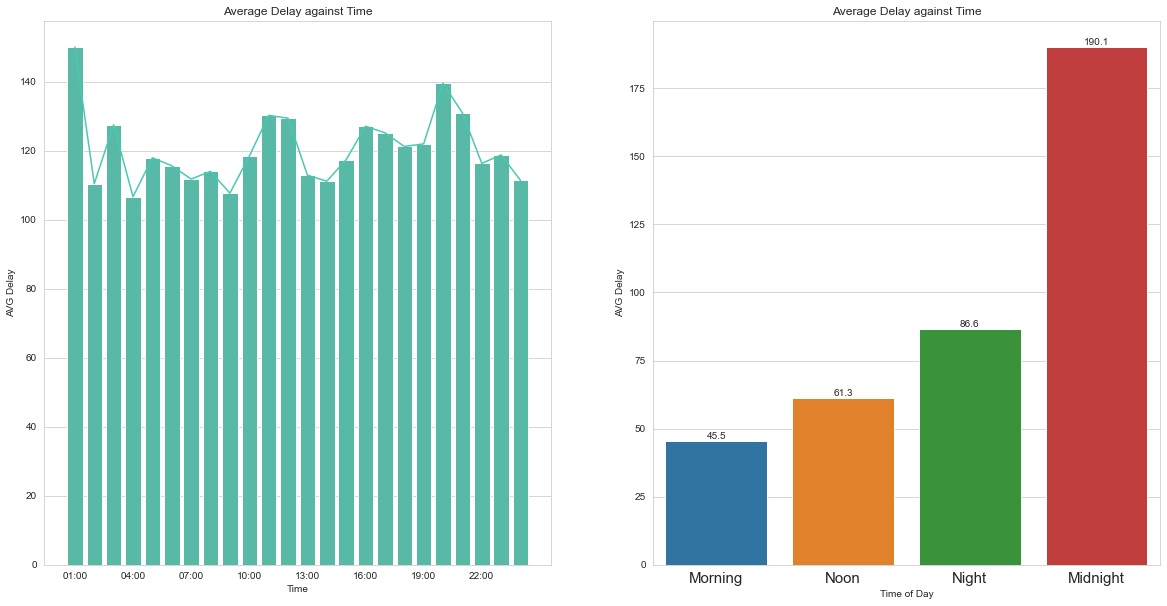

In [16]:
#AVG Delay plot for q1c
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,10))
q1c1_plt = sns.barplot(x="Time", y="AVG Delay",  data=q1c1_df, color = '#48C9B0', ci = None, ax = ax1)
q1c1_plt.set_xticks(q1c1_plt.get_xticks()[::3])
q1c1_plt.title.set_text("Average Delay against Time")
q1c1_plt.set_xlabel("Time")
q1c1_plt.set_ylabel("AVG Delay")
sns.lineplot(x = "Time" ,y = "AVG Delay",  data=q1c1_df, color = '#48C9B0', ci = None, ax = ax1)
plt.xticks(fontsize=15)

#count plot for q1c
q1c2_plt = sns.barplot(x = 'Time of Day', y = 'AVG Delay', data = q1c2_df, ax = ax2)
q1c2_plt.title.set_text("Average Delay against Time")
q1c2_plt.set_xticklabels(['Morning','Noon','Night','Midnight'])
q1c2_plt.set_xlabel("Time of Day")
q1c2_plt.set_ylabel("AVG Delay")
q1c2_plt.bar_label(q1c2_plt.containers[0])


## Question 2 : Do older planes suffer more delays?

In [17]:
#Using JOIN to merge ontime table with planedata table using common column called ontime
q2 = c.execute('''
SELECT planedata.manufacturer as Manufacturer, ontime.Year - planedata.year as Plane_Life, AVG(DepDelay + ArrDelay) as AVGDelay,
COUNT(ArrDelay), AVG(ArrDelay) , AVG(DepDelay)
FROM ontime JOIN planedata ON planedata.tailnum = ontime.Tailnum 
WHERE planedata.year < 2001 AND Cancelled = 0 AND Diverted = 0 AND Plane_life <1000 AND DepDelay > 0 AND ArrDelay > 0
GROUP BY Plane_Life
ORDER BY Manufacturer
''').fetchall()


In [18]:
#Converting to dataframe
q2_df = pd.DataFrame(q2, columns = ['Manufacturer','Plane Life','AVG Delay','Count','AVG Arr Delay','AVG Dep Delay'])
q2_df.info()
q2_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   39 non-null     object 
 1   Plane Life     39 non-null     int64  
 2   AVG Delay      39 non-null     float64
 3   Count          39 non-null     int64  
 4   AVG Arr Delay  39 non-null     float64
 5   AVG Dep Delay  39 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.0+ KB


,Manufacturer,Plane Life,AVG Delay,Count,AVG Arr Delay,AVG Dep Delay
0,AIRBUS INDUSTRIE,1,67.401155,60610,35.500363,31.900792
1,AIRBUS INDUSTRIE,2,70.635631,65409,37.327784,33.307848
2,AIRBUS INDUSTRIE,3,71.977310,33539,38.088345,33.888965
3,AIRBUS INDUSTRIE,6,76.497555,26582,40.440411,36.057144
4,AIRBUS INDUSTRIE,8,73.173743,67082,38.429489,34.744253


Text(0, 0.5, 'Count of Delay')

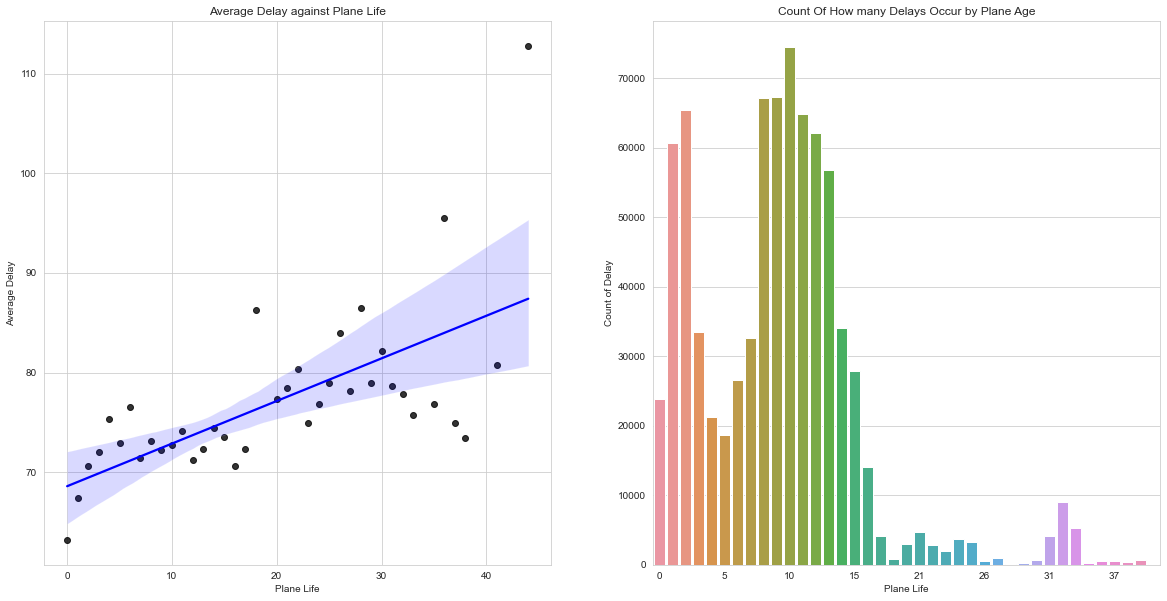

In [19]:
#scatterplot for average delay against plane life with reg line
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,10))
q2_plt = sns.regplot(x = 'Plane Life', y = 'AVG Delay',  data = q2_df, ax = ax1, #creating a regression plot with a scatterplot
            scatter_kws={"color": "black"}, line_kws={"color": "blue"}) #scatter_kws and line_kws is to select color
q2_plt.title.set_text("Average Delay against Plane Life")
q2_plt.set_ylabel("Average Delay")

#barplot for frequency of delay against plane life
q2_count_plt = sns.barplot(x = 'Plane Life', y = 'Count', data = q2_df, ax = ax2)
q2_count_plt.set_xticks(q2_count_plt.get_xticks()[::5])
q2_count_plt.title.set_text("Count Of How many Delays Occur by Plane Age")
q2_count_plt.set_ylabel("Count of Delay")

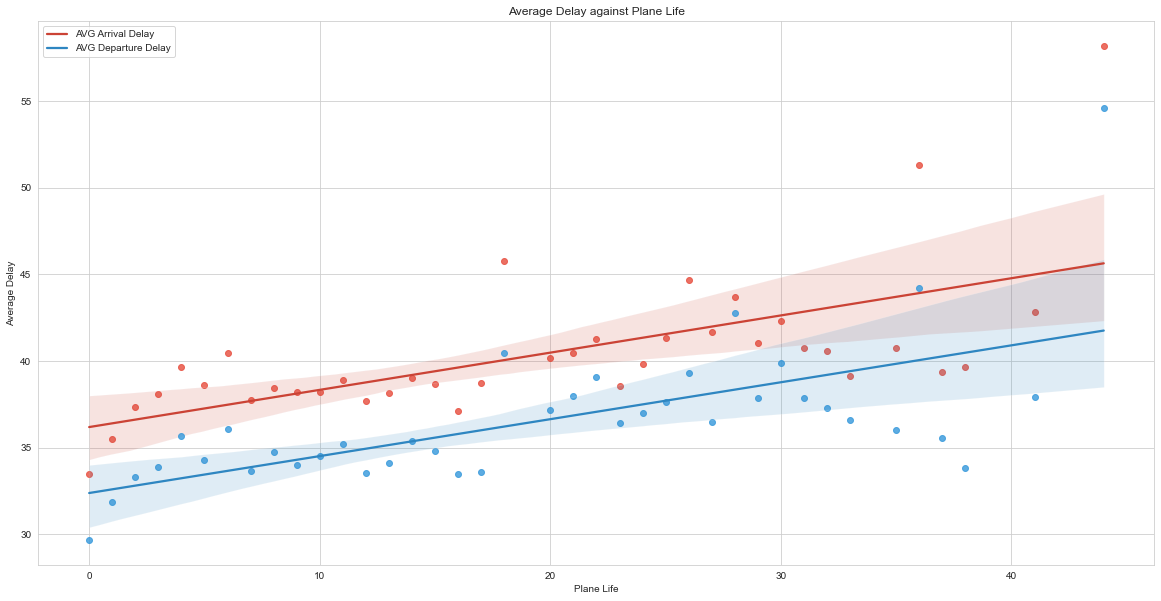

In [20]:
#scatter plot with average arrival delay and average departure against plane life

fig,(ax1) = plt.subplots(1, figsize = (20,10))
q2a_plt = sns.regplot(x = 'Plane Life', y = 'AVG Arr Delay',  data = q2_df, ax = ax1, 
            scatter_kws={"color": "#E74C3C"}, line_kws={"color": "#CB4335"})
q2a_plt.title.set_text("Average Delay against Plane Life")
q2a_plt.set_ylabel("Average Delay")

q2a_plt = sns.regplot(x = 'Plane Life', y = 'AVG Dep Delay',  data = q2_df, ax = ax1, 
            scatter_kws={"color": "#3498DB"}, line_kws={"color": "#2E86C1"})
q2a_plt.title.set_text("Average Delay against Plane Life")
q2a_plt.set_ylabel("Average Delay")
plt.legend(labels=["AVG Arrival Delay","AVG Departure Delay"]) #Adding legends

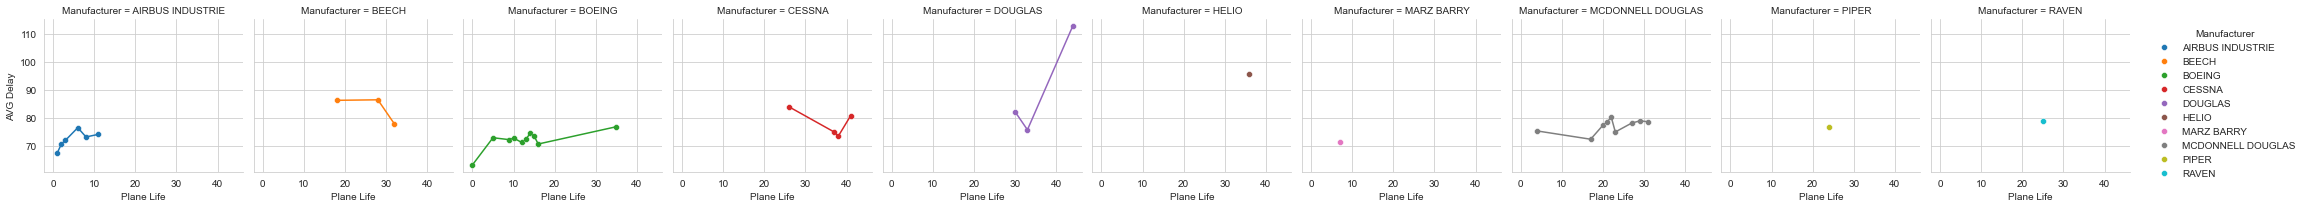

In [21]:
#facet grid of average delay against plane life grouped by manufacturer
q2_fplt = sns.FacetGrid(q2_df, col = 'Manufacturer', hue="Manufacturer") #Create a facet grid using Manufacturer as the grouping
q2_fplt.map(sns.scatterplot, "Plane Life", "AVG Delay") 
q2_fplt.map(sns.lineplot, "Plane Life", "AVG Delay")
q2_fplt.add_legend() #Adding legend

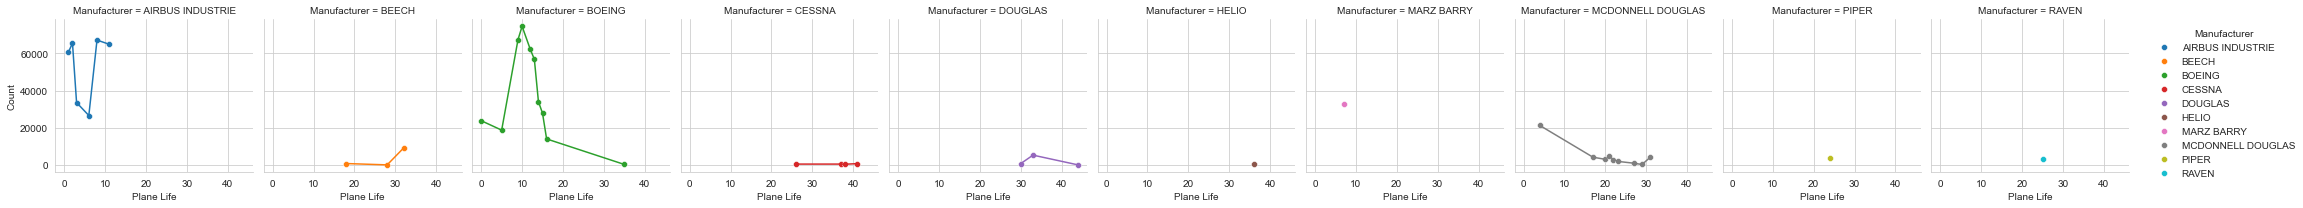

In [22]:
#facet grid of count of delay against plane life grouped by manufacturer
q2_fplt = sns.FacetGrid(q2_df, col = 'Manufacturer', hue="Manufacturer")
q2_fplt.map(sns.scatterplot, "Plane Life", "Count")
q2_fplt.map(sns.lineplot, "Plane Life", "Count")
q2_fplt.add_legend() 

## Question 3 : How does the number of people flying between different locations change over time?

In [23]:
q3a = c.execute('''
SELECT Year, Origin, Dest, COUNT(FlightNum) AS Total
FROM ontime
WHERE Cancelled = 0 AND Diverted = 0 AND Origin = 'ABE'
GROUP BY Origin,Dest,Year
''').fetchall()


In [24]:
q3b = c.execute('''
SELECT Year, Month, COUNT(FlightNum) AS Total
FROM ontime
WHERE Cancelled = 0 AND Diverted = 0 
GROUP BY Month,Year
''').fetchall()


In [25]:
q3a_df = pd.DataFrame(q3a, columns = ['Year','Origin','Destination','Total Flights'])
q3a_df.info()
q3a_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           14 non-null     int64 
 1   Origin         14 non-null     object
 2   Destination    14 non-null     object
 3   Total Flights  14 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 576.0+ bytes


,Year,Origin,Destination,Total Flights
0,2000,ABE,ATL,689
1,2001,ABE,ATL,585
2,2000,ABE,CLT,354
3,2001,ABE,CLT,354
4,2000,ABE,DTW,751


In [26]:
q3b_df = pd.DataFrame(q3b, columns = ['Year','Month','Total Flights'])
q3b_df.info()
q3b_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           24 non-null     int64
 1   Month          24 non-null     int64
 2   Total Flights  24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


,Year,Month,Total Flights
0,2000,1,444659
1,2001,1,509074
2,2000,2,428228
3,2001,2,458947
4,2000,3,471701


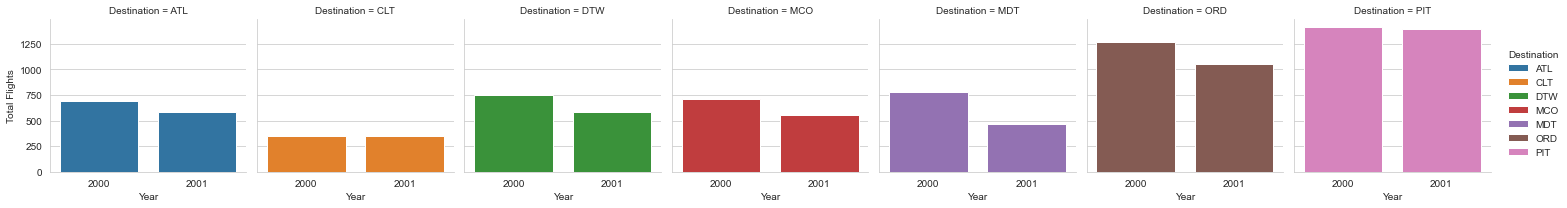

In [27]:
#Plot for q3a
q3a_plt = sns.FacetGrid(q3a_df, col = 'Destination', hue="Destination")
q3a_plt.map(sns.barplot, "Year", "Total Flights", order =  [2000,2001]) #To order the x axis months in order
q3a_plt.add_legend()


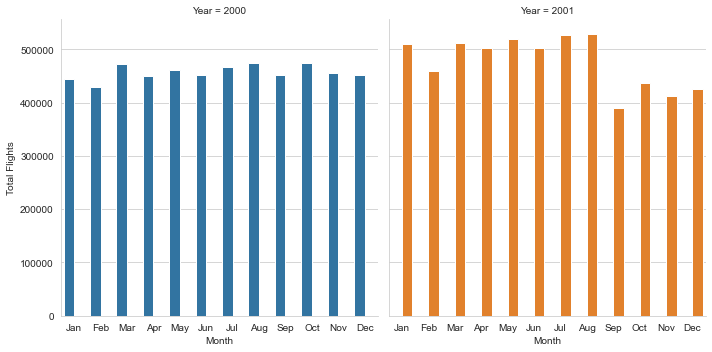

In [28]:
#Facet Plot for q3b
q3b_plt = sns.catplot(x="Month", y="Total Flights",
                hue="Year", col="Year",
                data=q3b_df, kind="bar")
q3b_plt.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Question 4 : Can you detect cascading failures as delays in one airport create delays in others?

In [29]:
#Q4 plotting arrival delay against Dep delay to see the relationship
q4a = c.execute('''
SELECT TailNum, Origin, Dest, DepDelay, ArrDelay
FROM Ontime
WHERE DepDelay >0 AND Cancelled = 0 AND Diverted = 0
LIMIT 34000
''').fetchall()

In [30]:
#Changing to a dataframe
q4a_df = pd.DataFrame(q4a, columns = ['TailNum','Origin','Destination','Dep Delay','Arr Delay'])
q4a_df.info()
q4a_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TailNum      34000 non-null  object 
 1   Origin       34000 non-null  object 
 2   Destination  34000 non-null  object 
 3   Dep Delay    34000 non-null  float64
 4   Arr Delay    34000 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


,TailNum,Origin,Destination,Dep Delay,Arr Delay
0,N653AW,ATL,PHX,1.0,40.0
1,N656AW,ATL,PHX,3.0,47.0
2,N652AW,ATL,PHX,5.0,4.0
3,N807AW,ATL,PHX,1.0,-7.0
4,N509DC,ATL,PHX,23.0,37.0


Text(0, 0.5, 'Arrival Delay')

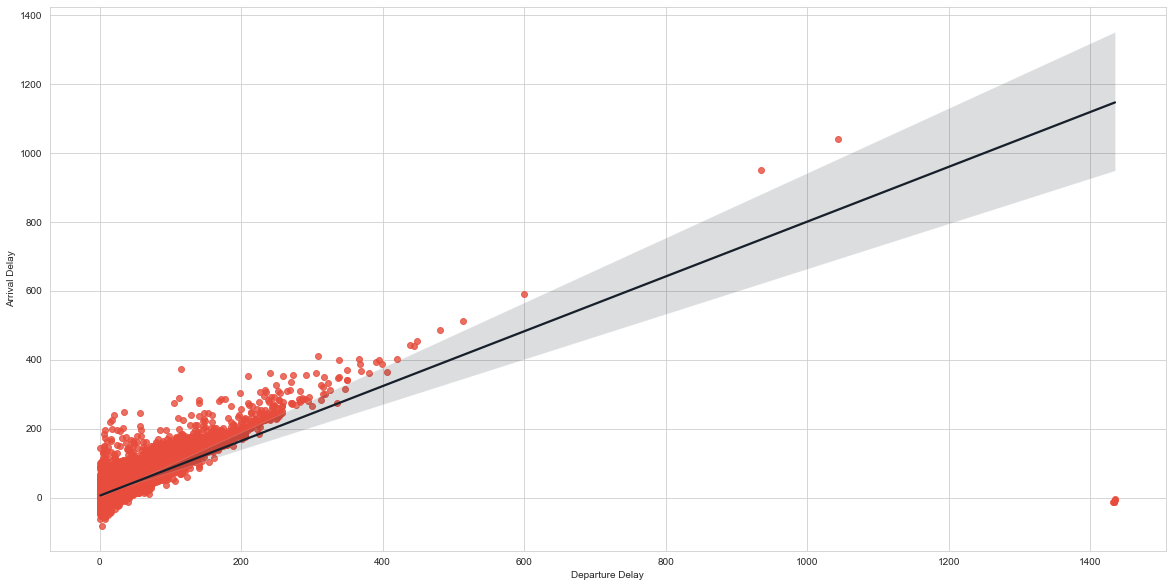

In [31]:
fig,(ax1) = plt.subplots(1, figsize = (20,10))
q4a_plt = sns.regplot(x = 'Dep Delay', y = 'Arr Delay',  data = q4a_df, ax = ax1, 
            scatter_kws={"color": "#E74C3C"}, line_kws={"color": "#17202A"})
q4a_plt.set_xlabel("Departure Delay")
q4a_plt.set_ylabel("Arrival Delay")

## Q4 Network X

In [32]:
#Querying data to use for networkx
q4b = c.execute('''
SELECT Origin, Dest, UniqueCarrier, ArrDelay, DepDelay
FROM ontime
WHERE Cancelled = 0 AND Diverted = 0 AND ArrDelay > 0 AND DepDelay > 0
LIMIt 5000
''').fetchall()

q4b

[('ATL', 'PHX', 'HP', 40.0, 1.0),
 ('ATL', 'PHX', 'HP', 47.0, 3.0),
 ('ATL', 'PHX', 'HP', 4.0, 5.0),
 ('ATL', 'PHX', 'HP', 37.0, 23.0),
 ('ATL', 'PHX', 'HP', 28.0, 36.0),
 ('ATL', 'PHX', 'HP', 9.0, 37.0),
 ('ATL', 'PHX', 'HP', 17.0, 3.0),
 ('ATL', 'PHX', 'HP', 21.0, 19.0),
 ('ATL', 'PHX', 'HP', 39.0, 23.0),
 ('ATL', 'PHX', 'HP', 37.0, 15.0),
 ('ATL', 'PHX', 'HP', 39.0, 28.0),
 ('ATL', 'PHX', 'HP', 44.0, 33.0),
 ('ATL', 'PHX', 'HP', 10.0, 10.0),
 ('ATL', 'PHX', 'HP', 88.0, 90.0),
 ('ATL', 'PHX', 'HP', 88.0, 59.0),
 ('ATL', 'PHX', 'HP', 100.0, 104.0),
 ('ATL', 'PHX', 'HP', 8.0, 1.0),
 ('ATL', 'PHX', 'HP', 21.0, 5.0),
 ('ATL', 'PHX', 'HP', 71.0, 69.0),
 ('ATL', 'PHX', 'HP', 6.0, 9.0),
 ('ATL', 'PHX', 'HP', 13.0, 17.0),
 ('ATL', 'PHX', 'HP', 10.0, 8.0),
 ('ATL', 'PHX', 'HP', 75.0, 84.0),
 ('ATL', 'PHX', 'HP', 31.0, 32.0),
 ('ATL', 'PHX', 'HP', 14.0, 7.0),
 ('ATL', 'PHX', 'HP', 13.0, 18.0),
 ('ATL', 'PHX', 'HP', 14.0, 20.0),
 ('ATL', 'PHX', 'HP', 52.0, 30.0),
 ('ATL', 'PHX', 'HP', 24.0, 9.0

In [33]:
#Changing q4b to a dataframe
q4b_df = pd.DataFrame(q4b, columns = ['Origin', 'Dest', 'Carrier', 'ArrDelay', 'DepDelay'])
q4b_df.head()


,Origin,Dest,Carrier,ArrDelay,DepDelay
0,ATL,PHX,HP,40.0,1.0
1,ATL,PHX,HP,47.0,3.0
2,ATL,PHX,HP,4.0,5.0
3,ATL,PHX,HP,37.0,23.0
4,ATL,PHX,HP,28.0,36.0


In [34]:
#Transform the data to triplets (Origin, Destination , UniqueCarrier)
df = q4b_df[['Origin','Dest','Carrier']]
df = df.drop_duplicates()
df.head()

,Origin,Dest,Carrier
0,ATL,PHX,HP
37,AUS,PHX,HP
55,AUS,PHX,WN
85,BHM,PHX,WN
87,BNA,PHX,WN


In [35]:
#Focusing on the most frequest occuring top 30 Origin that has the highest flight frequency using groupby() function.
org_df = df.groupby(['Origin','Carrier']).agg('count').reset_index() #this takes all possible pairs and counts the frequency of each pair 
toporgs = org_df.groupby(['Origin'])['Origin'].agg('count') #takes the frequency of each origin and store them
toporgs = toporgs.sort_values(ascending=False)[:30].keys().tolist() #Top 30 airports with the highest frquency of carrier flights
toporgs[:10] #Sort the organisation in terms of frequency and print the top 10

['SAN', 'LAX', 'BWI', 'STL', 'SLC', 'SFO', 'SEA', 'PDX', 'ORD', 'DFW']

In [36]:
from itertools import combinations #import package to integrate an event and record all possible pairs between them

carrier_df = df.groupby('Carrier') 
dfs = pd.DataFrame(columns = ['Carrier','Org1','Org2'])

for name, group in carrier_df:  #loops over all group and repeat the above process.
    orgs = group['Origin'].unique() 
    orgs = [val for val in orgs if val in toporgs]
    if len(orgs)>1:
        carrier_edge = pd.DataFrame(data = list(combinations(orgs,2)),columns = ['Org1', 'Org2']) 
        carrier_edge['Carrier'] = name
        dfs = pd.concat([dfs, carrier_edge])

dfs.head()
#Each row in dfs correspond to a user initiating an event to two different origins

,Carrier,Org1,Org2
0,AA,DFW,ORD
0,AS,PDX,SEA
0,DL,DFW,JFK
1,DL,DFW,SAN
2,DL,DFW,SLC


In [37]:
#Produce the final data frame that allows for a more efficient way to construct the network by counting the number of edge(pairs)
#and record it 
dfs = dfs.groupby(['Org1', 'Org2']).agg('count').reset_index().rename(columns = {'Carrier':'weight'})
dfs = dfs.sort_values(by = 'weight', ascending = False)
dfs.head()


,Org1,Org2,weight
271,LAX,SFO,3
409,SAN,SLC,3
410,SAN,STL,3
378,PDX,SEA,3
355,ONT,SAN,2


In [38]:
#Import network package 
#Create the network by adding edges one by one
import networkx as nx
G = nx.Graph()


for index, row in dfs.iterrows():
    G.add_edge(row['Org1'], row['Org2'], weight=row['weight'])

    
# remove isolated vertices
remove = [node for node,degree in G.degree() if degree ==0]
G.remove_nodes_from(remove)



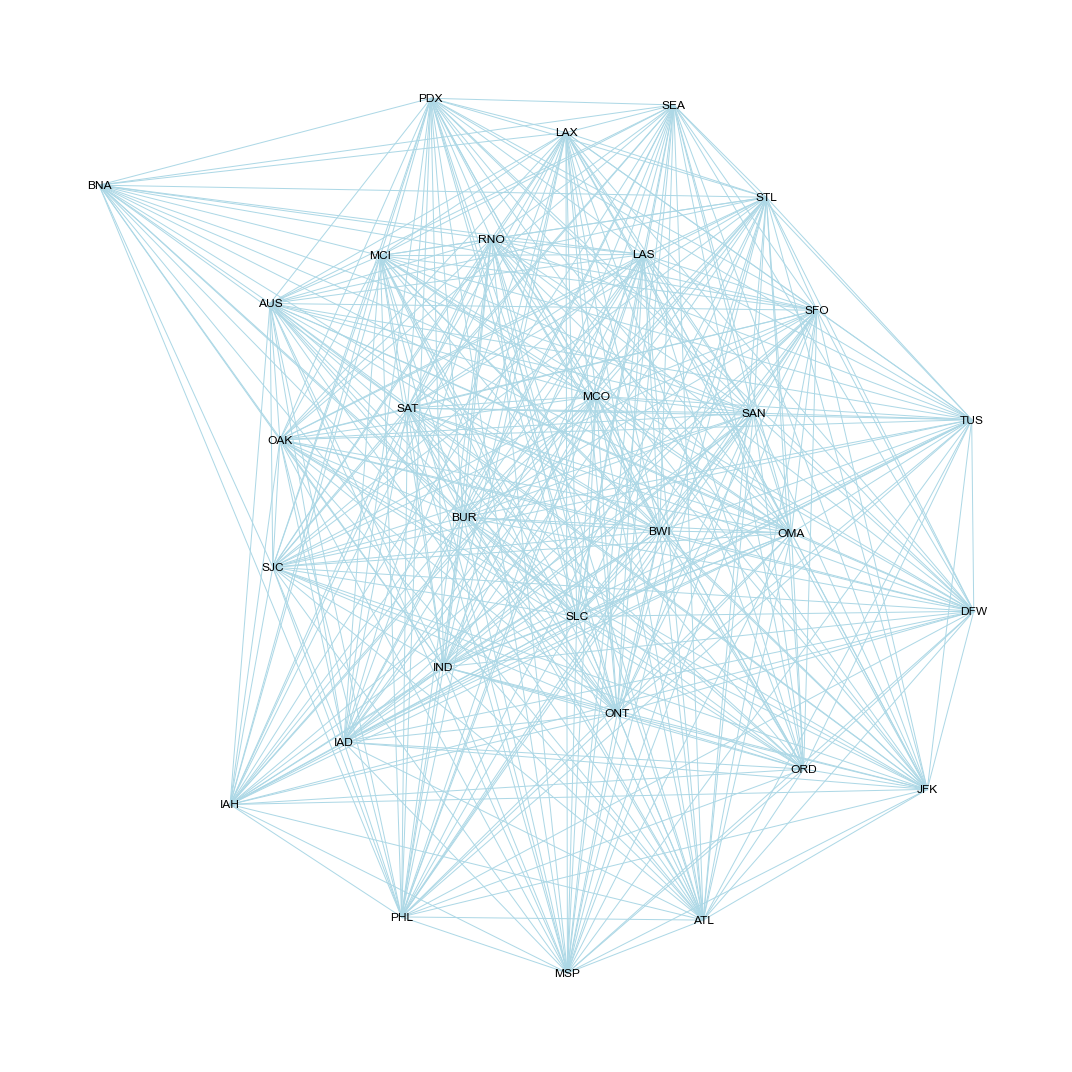

In [39]:
#Visualize the networkx using networkx package and using spring style after editing the network options for size and color.

#Setting size and colours
options = {
'node_color': 'lightblue',
 'edge_color': 'lightblue',
 'node_size': 1,
 'width': 1,
 'alpha': 1.0,
}

# Producing the network
plt.subplots(figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos)
plt.tight_layout()
plt.axis('off');
plt.show()


# Question 5: Use the available variables to construct a model that predicts delays.

## Q5 Linear Regression Model

In [40]:
#Querying the proper data from SQL for linear regression
q5a = c.execute('''
SELECT 
ArrTime,CRSArrTime,ArrDelay,
DepTime,CRSDepTime,DepDelay,
TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Distance
FROM ontime
WHERE Cancelled = 0 AND Diverted = 0 AND DepDelay >0 AND ArrDelay >0
LIMIT 1000
''').fetchall()

In [41]:
#Converted q5a to a dataframe
q5a_df = pd.DataFrame(q5a,columns=[
'ArrTime','CRSArrTime','ArrDelay',
'DepTime','CRSDepTime','DepDelay', 
'TaxiIn','TaxiOut','ActualElapsedTime','CRSElapsedTime','Distance'])
q5a_df.info()
q5a_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ArrTime            1000 non-null   float64
 1   CRSArrTime         1000 non-null   int64  
 2   ArrDelay           1000 non-null   float64
 3   DepTime            1000 non-null   float64
 4   CRSDepTime         1000 non-null   int64  
 5   DepDelay           1000 non-null   float64
 6   TaxiIn             1000 non-null   int64  
 7   TaxiOut            1000 non-null   int64  
 8   ActualElapsedTime  1000 non-null   float64
 9   CRSElapsedTime     1000 non-null   float64
 10  Distance           1000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 86.1 KB


,ArrTime,CRSArrTime,ArrDelay,DepTime,CRSDepTime,DepDelay,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Distance
0,1939.0,1859,40.0,1648.0,1647,1.0,5,47,291.0,252.0,1587
1,1148.0,1101,47.0,849.0,846,3.0,8,24,299.0,255.0,1587
2,1912.0,1908,4.0,1702.0,1657,5.0,5,13,250.0,251.0,1587
3,2230.0,2153,37.0,1955.0,1932,23.0,5,38,275.0,261.0,1587
4,2221.0,2153,28.0,2008.0,1932,36.0,4,12,253.0,261.0,1587


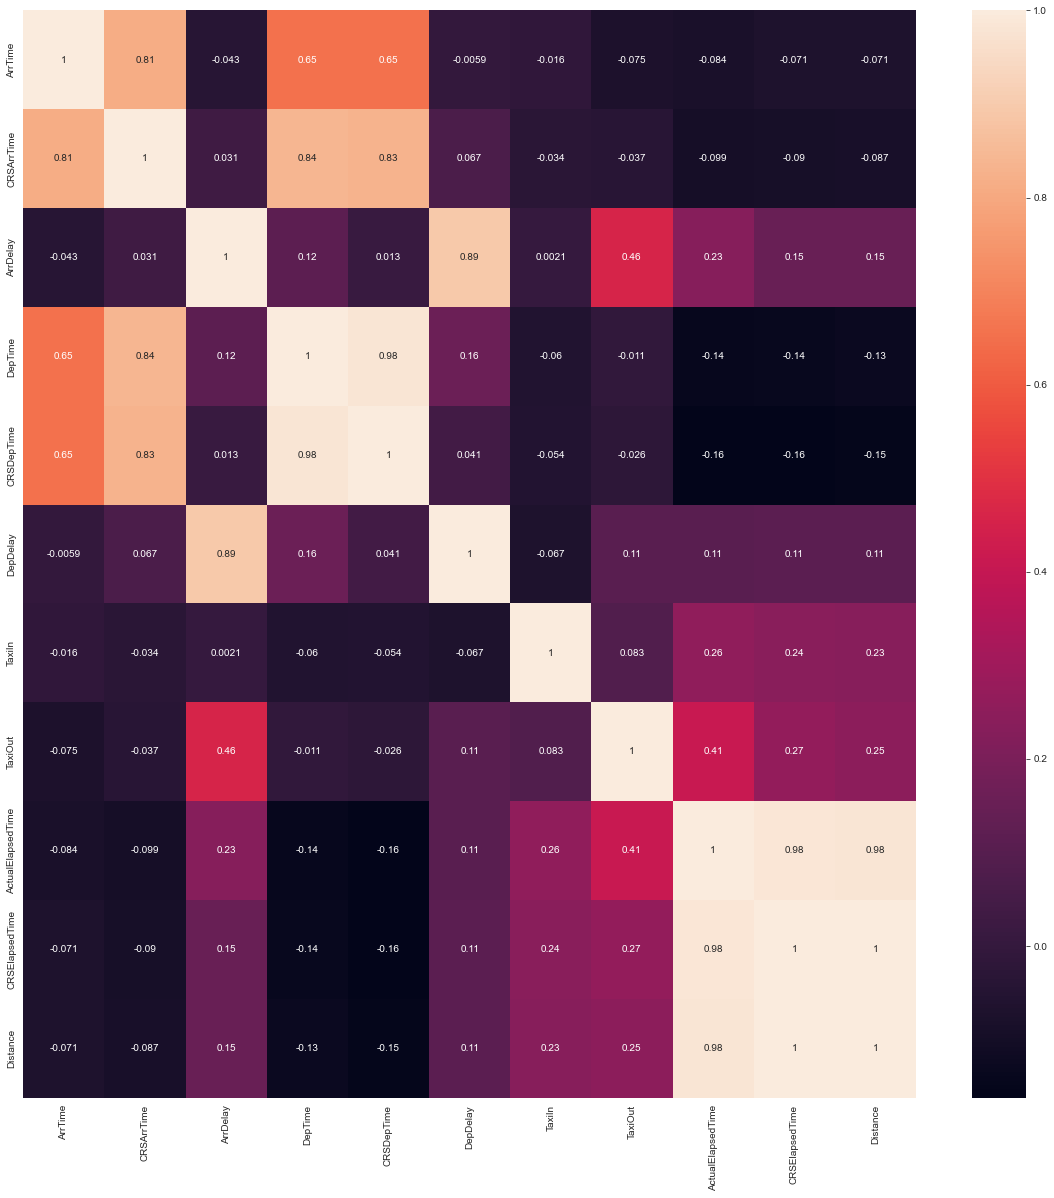

In [42]:
#Plotting heatmap to see correlation between all the variables
fig,(ax) = plt.subplots(1, figsize = (20,20)) 
q5a_heatmap = sns.heatmap(q5a_df.corr(), annot = True) #plotting the correlation heatmap with annotations on 20,20 size axis
plt.savefig('q5a_heatmap.png')

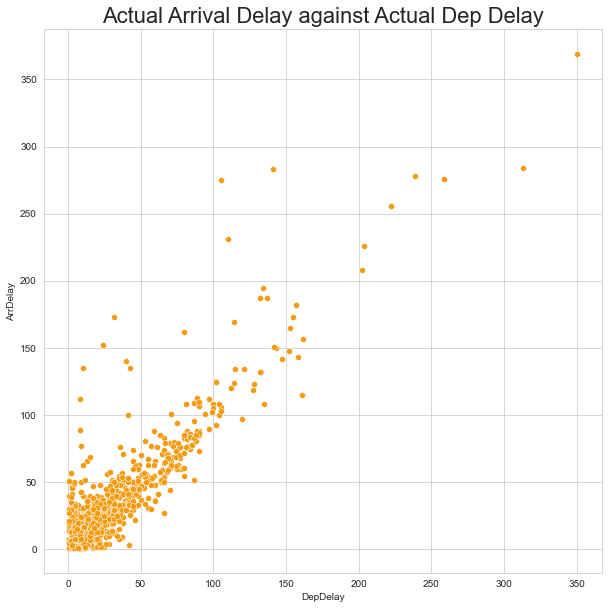

In [43]:
#Using actual arrival delay vs actual dep delay before prediction
fig, (ax1) = plt.subplots(1,figsize = (10,10))
q5a_plt1 = sns.scatterplot(x= 'DepDelay', y='ArrDelay', data = q5a_df, color = '#F39C12', ax = ax1 )
q5a_plt1.set_title("Actual Arrival Delay against Actual Dep Delay", size = 22)
plt.savefig('q5a_plt1.png')

In [44]:
#supervised learning
#splitting the data to training data and testing data with a test size of 70% and a random state of 1 to fix the results.
#Random state is same as set seed
X_train,X_test, y_train, y_test = train_test_split(q5a_df.DepDelay, q5a_df.ArrDelay,test_size=0.7,random_state=1)

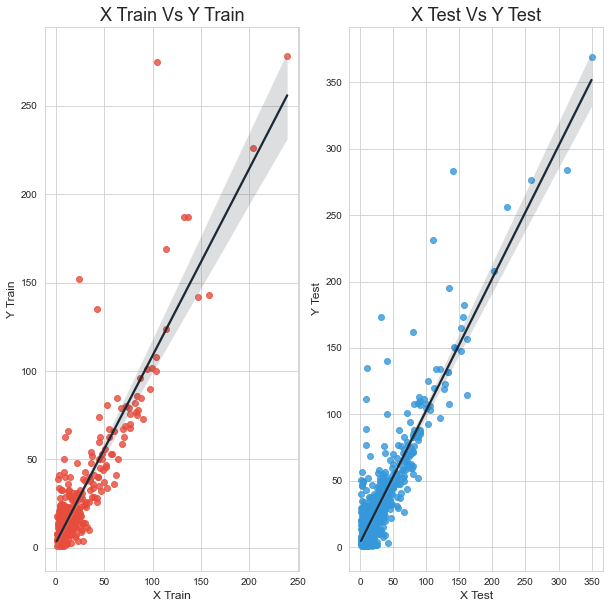

In [45]:
#Plotting X train vs Y train and X test vs Y test
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,10))

q5a_plt2 = sns.regplot(x = X_train , y = y_train, ax = ax1, 
            scatter_kws={"color": "#E74C3C"}, line_kws={"color": "#1C2833"})
q5a_plt2.set_title("X Train Vs Y Train", size = 18)
q5a_plt2.set_xlabel("X Train", size = 12)
q5a_plt2.set_ylabel("Y Train", size = 12)

q5a_plt3 = sns.regplot(x = X_test , y = y_test, ax = ax2, 
            scatter_kws={"color": "#3498DB"}, line_kws={"color": "#1C2833"})
q5a_plt3.set_title("X Test Vs Y Test", size = 18)
q5a_plt3.set_xlabel("X Test", size = 12)
q5a_plt3.set_ylabel("Y Test", size = 12)
plt.savefig('q5a_plt2.png')

In [46]:
#create linear model n train it using training data

LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [47]:
#predict arr delay with dep delay of 50. The 50 can be changed to any other number.
LR.predict(np.array([[50]]))[0]

55.74115938478879

In [48]:
#Score this model (max score is 1.0 therefore 0.80 is quite good)
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.805213904968633

## Q5 Classification Models

In [49]:
#querying the data
q5b  = c.execute('''
SELECT ArrDelay,DepDelay,TaxiIn,TaxiOut,Distance,ActualElapsedTime,Origin,Dest,TailNum
FROM ontime
WHERE Diverted = 0 AND Cancelled = 0 AND DepDelay IS NOT NULL AND ArrDelay IS NOT NULL
LIMIT 100000
''').fetchall()


In [50]:
#Convert to dataframe
q5b_df = pd.DataFrame(q5b,columns=['ArrDelay','DepDelay','TaxiIn','TaxiOut',
                                   'Distance','ActualElapsedTime','Origin','Dest','TailNum'])

In [51]:
#Creating the category using CASE conditions for delay = 0 is for delay <= 0  and 1 is for delay > 0 for classification

delay_category = c.execute('''
SELECT 
(CASE WHEN DepDelay OR ArrDelay <= 0 THEN 0 WHEN DepDelay OR ArrDelay > 0 THEN 1 END) AS delaycategory
FROM ontime
WHERE Diverted = 0 AND Cancelled = 0 AND DepDelay IS NOT NULL AND ArrDelay IS NOT NULL
LIMIT 120000
''').fetchall()

In [52]:
#Convert to dataframe with the new category inside
delay_category_df = pd.DataFrame(delay_category,columns=['delaycategory'])
delay_category_df.head()
delay_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   delaycategory  120000 non-null  int64
dtypes: int64(1)
memory usage: 937.6 KB


In [53]:
#combine the dataframe q5b_df and the delay category dataframe along rows and columns
q5_with_delaycategory_df = pd.concat([q5b_df,delay_category_df],axis=1)
q5_with_delaycategory_df.head()
q5_with_delaycategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ArrDelay           100000 non-null  float64
 1   DepDelay           100000 non-null  float64
 2   TaxiIn             100000 non-null  float64
 3   TaxiOut            100000 non-null  float64
 4   Distance           100000 non-null  float64
 5   ActualElapsedTime  100000 non-null  float64
 6   Origin             100000 non-null  object 
 7   Dest               100000 non-null  object 
 8   TailNum            100000 non-null  object 
 9   delaycategory      120000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 9.2+ MB


In [54]:
features = ['ArrDelay','DepDelay','TaxiIn','TaxiOut','Distance','ActualElapsedTime','Origin','Dest','TailNum']
X = q5_with_delaycategory_df[features].copy()

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ArrDelay           100000 non-null  float64
 1   DepDelay           100000 non-null  float64
 2   TaxiIn             100000 non-null  float64
 3   TaxiOut            100000 non-null  float64
 4   Distance           100000 non-null  float64
 5   ActualElapsedTime  100000 non-null  float64
 6   Origin             100000 non-null  object 
 7   Dest               100000 non-null  object 
 8   TailNum            100000 non-null  object 
dtypes: float64(6), object(3)
memory usage: 8.2+ MB


In [56]:
#Imputing mean in the case of missing variables and select the numerical variables.
numerical_features = ['ArrDelay','DepDelay','TaxiIn','TaxiOut','Distance','ActualElapsedTime']
#Impute mean for numerical using simple imputer or standard scaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

#Select the categorical variables
categorical_features = ['Origin','Dest','TailNum']

#Impute mean for categorical using simple imputer or one hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Put everything together for numerical and categorical
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])

In [57]:
#Splitting training and test data with a test size of 70% and set random state to 1 for consistent result
X_train, X_test, y_train, y_test = train_test_split(X,delay_category_df, test_size=0.7,random_state=1)

In [58]:
#Imputing mean using mean and median for numerical variables and constant and most frequent for categorical variables

param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}

In [59]:
#Creating Linear regression model
pipe_lr  = Pipeline(steps=[('data_transformer', data_transformer), #
                      ('pipe_lr', LogisticRegression(max_iter=10000))]) #Set max interations to 10000
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid) 
grid_lr.fit(X_train, y_train.values.ravel()); 
#ravel() functions returns contiguous flattened array. 
#A copy is made only if needed

In [60]:
#Creating Random Forest Model
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_rf', RandomForestClassifier(random_state=1))]) #random state 1 to have consistent result
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
grid_rf.fit(X_train, y_train.values.ravel());

In [61]:
#Creating Support vector machine model
pipe_svm = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_svm',  LinearSVC(random_state=1, max_iter=10000, tol=0.01))]) 
                            #Highly unlikely that values are not equal perfectly to 0
                            #therefore setting tolerance to 0.01 allow a bit of wiggle room.
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid)
grid_svm.fit(X_train, y_train.values.ravel());

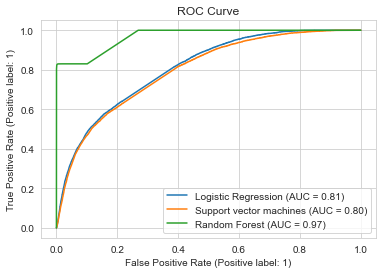

In [62]:
#Plotting the ROC curve using the three learners above
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression') 
plot_roc_curve(grid_svm, X_test, y_test, ax=ax, name='Support vector machines')
plot_roc_curve(grid_rf, X_test, y_test, ax=ax, name='Random Forest')
plt.title('ROC Curve')
plt.savefig('q5b_plt1.png')